In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train1 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train1\\"
train2 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train2\\"
train3 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train3\\"
train = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train\\"
test = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\"

In [3]:
img_size = 256
def label_img(name):
    word_label = name.split('.')[0]
    if word_label == 'cat' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data():
    train_data =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data.append([np.array(img),label])
        
    
    return shuffle(train_data)
        

In [4]:
from sklearn.utils import shuffle
DIR =train1
train_data = load_training_data()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 1]')

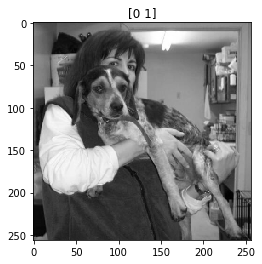

In [5]:
plt.imshow(train_data[3][0],cmap ='gist_gray')
plt.title(train_data[3][1])

In [6]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, 256,256, 1)
trainLabels = np.array([i[1] for i in train_data])

In [7]:
input = Input(shape =(256,256, 1))
x = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

layer = Flatten()(x)
layer = Dense(256, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(128, activation='relu')(layer)
layer = Dense(2, activation = 'softmax')(layer)

model2 = Model(input,layer)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [9]:
history = model2.fit(trainImages, trainLabels, batch_size = 32 , epochs = 5, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
300/300 [==============================] - 65s 217ms/step - loss: 0.9610 - acc: 0.6567
Epoch 2/5
300/300 [==============================] - 67s 224ms/step - loss: 0.4763 - acc: 0.8167
Epoch 3/5
300/300 [==============================] - 68s 226ms/step - loss: 0.2879 - acc: 0.8600
Epoch 4/5
300/300 [==============================] - 66s 221ms/step - loss: 0.1636 - acc: 0.9433
Epoch 5/5
300/300 [==============================] - 66s 221ms/step - loss: 0.1381 - acc: 0.9433


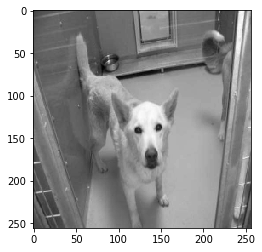

In [10]:
TEST_DIR = test
def load_test_data():
    test_data =[]
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data.append([np.array(img),label])
        
    
    return shuffle(test_data)
        

test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [11]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model2.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

24.66666676600774


In [12]:
img_size = 256
def label_img1(name):
    word_label = name.split('.')[0]
    if word_label == 'dog' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data1():
    train_data1 =[]
    for img in os.listdir(DIR1):
        label = label_img1(img)
        path = os.path.join(DIR1,img)
        img = cv2.imread(DIR1+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data1.append([np.array(img),label])
        
    
    return shuffle(train_data1)

In [13]:
from sklearn.utils import shuffle
DIR1 =train2
train_data1 = load_training_data1()

Text(0.5, 1.0, '[1 0]')

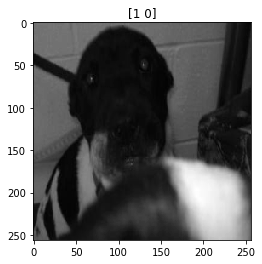

In [14]:
plt.imshow(train_data1[3][0],cmap ='gist_gray')
plt.title(train_data1[3][1])

In [15]:
trainImages1 = np.array([i[0] for i in train_data1]).reshape(-1, 256,256, 1)
trainLabels1 = np.array([i[1] for i in train_data1])

In [16]:
x1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1) 
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
x1.trainable =True

layer1 = Flatten()(x1)
layer1 = Dense(256, activation='relu')(layer1)
layer1 = Dropout(0.2)(layer1)
layer1 = Dense(128, activation='relu')(layer1)
layer1 = Dense(2, activation = 'softmax')(layer1)

model3 = Model(input,layer1)

In [17]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
history1 = model3.fit(trainImages1, trainLabels1, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 70s 232ms/step - loss: 0.8668 - acc: 0.6100
Epoch 2/5
300/300 [==============================] - 66s 219ms/step - loss: 0.4395 - acc: 0.8133
Epoch 3/5
300/300 [==============================] - 68s 225ms/step - loss: 0.3296 - acc: 0.8900
Epoch 4/5
300/300 [==============================] - 66s 219ms/step - loss: 0.2496 - acc: 0.9000
Epoch 5/5
300/300 [==============================] - 64s 215ms/step - loss: 0.2227 - acc: 0.9233


In [19]:
testImages1 = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels1 = np.array([i[1] for i in test_data])

loss, acc = model3.evaluate(testImages1, testLabels1, verbose = 0)
print(acc * 100)

17.333333392937977


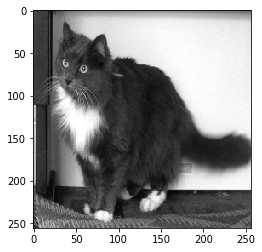

In [20]:
TEST_DIR = test
def load_test_data1():
    test_data1 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data1.append([np.array(img),label])
        
    
    return shuffle(test_data1)
        

test_data1 = load_test_data1()    
plt.imshow(test_data1[10][0], cmap = 'gist_gray')

In [21]:
img_size = 256
def label_img2(name):
    word_label = name[:5]
    if word_label == 'horse' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data2():
    train_data3 =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data3.append([np.array(img),label])
        
    
    return shuffle(train_data3)
        

In [22]:
from sklearn.utils import shuffle
DIR =train3
train_data3 = load_training_data2()

Text(0.5, 1.0, '[0 1]')

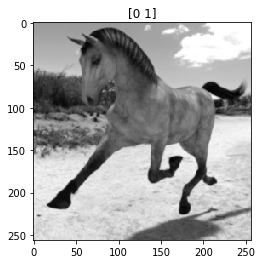

In [23]:
plt.imshow(train_data3[3][0],cmap ='gist_gray')
plt.title(train_data3[3][1])

In [24]:
trainImages3 = np.array([i[0] for i in train_data3]).reshape(-1, 256,256, 1)
trainLabels3 = np.array([i[1] for i in train_data3])

In [25]:
x2 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(96, kernel_size=(3,3), activation='relu')(x2) 
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(96, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)

layer2 = Flatten()(x2)
layer2 = Dense(256, activation='relu')(layer2)
layer2 = Dropout(0.2)(layer2)
layer2 = Dense(128, activation='relu')(layer2)
layer2 = Dense(2, activation = 'softmax')(layer2)

model4 = Model(input,layer2)

In [26]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [27]:
history2 = model4.fit(trainImages3, trainLabels3, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
200/200 [==============================] - 46s 232ms/step - loss: 0.7192 - acc: 0.7250
Epoch 2/5
200/200 [==============================] - 46s 230ms/step - loss: 0.2542 - acc: 0.9250
Epoch 3/5
200/200 [==============================] - 45s 224ms/step - loss: 0.1407 - acc: 0.9500
Epoch 4/5
200/200 [==============================] - 44s 220ms/step - loss: 0.1109 - acc: 0.9500
Epoch 5/5
200/200 [==============================] - 44s 222ms/step - loss: 0.0480 - acc: 0.9850


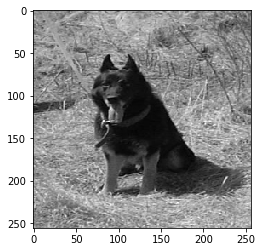

In [28]:
TEST_DIR = test
def load_test_data3():
    test_data3 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data3.append([np.array(img),label])
        
    
    return shuffle(test_data3)
        

test_data3 = load_test_data3()    
plt.imshow(test_data3[10][0], cmap = 'gist_gray')

In [29]:
testImages3 = np.array([i[0] for i in test_data3]).reshape(-1, 256,256, 1)
testLabels3 = np.array([i[1] for i in test_data3])

loss, acc = model4.evaluate(testImages3, testLabels3, verbose = 0)
print(acc * 100)

84.6666669845581


In [30]:
filenames = sorted(os.listdir(train))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(train + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(153600, 256)

In [31]:
imgs4 = np.reshape(imgs4, [ 600, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(402, 256, 256)
(198, 256, 256)


In [32]:
imgs = np.reshape(imgs4, [ 600, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
#classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (402, 256, 256) 402
Testing data shape :  (198, 256, 256) 198
Total number of outputs :  3
Output classes :  ['cat' 'dog' 'hor']


In [33]:
train_labels=[0 if x=='cat' else 1 if x =='dog' else 2 for x in train_labels]
print(train_labels)
len(train_labels)

[2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 

402

In [34]:
test_labels=[0 if x=='cat' else 1 if x =='dog' else 2 for x in test_labels]
print(test_labels)
len(test_labels)

[0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1]


198

In [35]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
402
198
Original label :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1.]
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0.]


In [36]:
from keras.layers import Activation

input_shape =(256,256,1)
a = Flatten()(x)
a = Activation('relu')(a)
b = Flatten()(x1)
b = Activation('relu')(b)
c = Flatten()(x2)
c = Activation('relu')(c)
mergedOut = concatenate([a,b,c], axis = 0)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dense(3, activation = 'softmax')(mergedOut)

model5 = Model(input,mergedOut)

In [37]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [38]:
model5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [39]:
history4 = model5.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,validation_data=(test_data, test_labels_one_hot))

Train on 402 samples, validate on 198 samples
Epoch 1/20
402/402 [==============================] - 296s 736ms/step - loss: 0.6471 - acc: 0.6819 - val_loss: 0.8535 - val_acc: 0.5701
Epoch 2/20
402/402 [==============================] - 259s 644ms/step - loss: 0.4197 - acc: 0.7620 - val_loss: 1.1789 - val_acc: 0.5612
Epoch 3/20
402/402 [==============================] - 269s 669ms/step - loss: 0.3767 - acc: 0.7706 - val_loss: 3.5365 - val_acc: 0.5393
Epoch 4/20
402/402 [==============================] - 261s 650ms/step - loss: 0.3604 - acc: 0.7706 - val_loss: 1.6095 - val_acc: 0.5438
Epoch 5/20
402/402 [==============================] - 282s 702ms/step - loss: 0.3474 - acc: 0.7722 - val_loss: 2.2914 - val_acc: 0.5398
Epoch 6/20
402/402 [==============================] - 280s 698ms/step - loss: 0.3290 - acc: 0.7734 - val_loss: 2.1710 - val_acc: 0.5325
Epoch 7/20
402/402 [==============================] - 315s 784ms/step - loss: 0.3234 - acc: 0.7830 - val_loss: 3.2750 - val_acc: 0.5426
Ep

In [41]:
imgcat=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgdog=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgcat=cv2.resize(imgcat,(256,256))
imgcat = cv2.cvtColor(cv2.resize(imgcat,(256,256)),cv2.COLOR_BGR2GRAY)
imgcat=imgcat.reshape(1,256,256,1)
imgdog=cv2.resize(imgdog,(256,256))
imgdog = cv2.cvtColor(cv2.resize(imgdog,(256,256)),cv2.COLOR_BGR2GRAY)
imgdog=imgdog.reshape(1,256,256,1)
images=([imgcat])
prediction=model5.predict([imgcat],steps=1)

In [42]:
prediction

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [44]:
model5.evaluate(test_data, test_labels_one_hot,batch_size =1)

198/198 [==============================] - 37s 187ms/step


[1.7450245476732864, 0.5639730737064824]

In [45]:
model5.trainable = True 
history4 = model5.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,validation_data=(test_data, test_labels_one_hot))

Train on 402 samples, validate on 198 samples
Epoch 1/20
402/402 [==============================] - 243s 604ms/step - loss: 0.2126 - acc: 0.8999 - val_loss: 1.4968 - val_acc: 0.5584
Epoch 2/20
402/402 [==============================] - 182s 452ms/step - loss: 0.1922 - acc: 0.9124 - val_loss: 3.7543 - val_acc: 0.5657
Epoch 3/20
402/402 [==============================] - 196s 487ms/step - loss: 0.1736 - acc: 0.9234 - val_loss: 2.8540 - val_acc: 0.5488
Epoch 4/20
402/402 [==============================] - 203s 506ms/step - loss: 0.1578 - acc: 0.9320 - val_loss: 2.8646 - val_acc: 0.5584
Epoch 5/20
402/402 [==============================] - 228s 568ms/step - loss: 0.1503 - acc: 0.9317 - val_loss: 2.8589 - val_acc: 0.5544
Epoch 6/20
402/402 [==============================] - 214s 533ms/step - loss: 0.1256 - acc: 0.9500 - val_loss: 2.7647 - val_acc: 0.5595
Epoch 7/20
402/402 [==============================] - 209s 521ms/step - loss: 0.1171 - acc: 0.9511 - val_loss: 3.1054 - val_acc: 0.5527
Ep

In [ ]:
model4.evaluate(test_data, test_labels_one_hot,batch_size= 1)

In [ ]:
prediction1=model3.predict([imgdog],steps=1)

In [39]:
prediction2=model2.predict([imgcat],steps=1)

In [40]:
prediction1

array([[1., 0.]], dtype=float32)

In [1]:
imgcat=imgcat.reshape(256,256,1)
imgdog=imgdog.reshape(256,256,1)
import matplotlib.pyplot as plt
if(prediction[:,:]>0.5).any():
    value ='cat :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='dog :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

cv2.imshow('imgdog',imgdog)


NameError: name 'imgcat' is not defined

In [225]:
from keras.layers.normalization import BatchNormalization

model5 = Sequential([Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization()])

In [226]:
model6 = Sequential([Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization()])

In [239]:
model_concat = concatenate([model5.output, model6.output], axis=-1)

In [240]:
model_concat= Flatten()(model_concat)
model_concat= Dense(128, activation='softmax')(model_concat)
model_concat= Dense(128, activation='softmax')(model_concat)
model_concat= Dropout(0.2)(model_concat)
model_concat = Dense(2, activation='softmax')(model_concat)
model8 = Model(inputs=[model5.input, model6.input], outputs=model_concat)

In [241]:
model8.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])